# Movie Recommender System Project (Content Based)

## Types of  Recommender systems
### 1. Content-Based
 How it works: Recommends items based on their characteristics and how well they match your preferences.

Example: If you like action movies, it will suggest other movies with similar action elements.

### 2. Collaborative Filtering
How it works: Recommends items based on the behavior and preferences of other users who have similar tastes to yours.

Example: If people who like the same movies as you also liked a new film, it will suggest that film to you.

### 3. Hybrid
How it works: Combines both content-based and collaborative filtering methods to make better recommendations.

Example: A system might use your movie preferences (content-based) and also consider what similar users have liked (collaborative filtering) to suggest films.

## Porject Flow
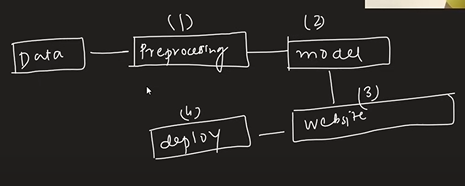

In [445]:
import numpy as np
import pandas as pd

# Data Preprocessing

In [446]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

### Marge the datasets

In [447]:
movies = movies.merge(credits, on='title')

In [448]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [449]:
# Geners 
# id
# keywords
# Title
# overviews
# cast 
# crew 

movies= movies[['movie_id', 'title','overview', 'genres','keywords','cast','crew']]

In [450]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [451]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [452]:
movies.dropna(inplace=True)

In [453]:
movies.duplicated().sum()

np.int64(0)

In [454]:
import ast
ast.literal_eval

<function ast.literal_eval(node_or_string)>

In [455]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [456]:
def convert(obj):
    l = []
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

In [457]:
movies['genres'] = movies['genres'].apply(convert)

In [458]:
movies['keywords']=movies['keywords'].apply(convert)

In [459]:
def convert3(obj):
    l = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            l.append(i['name'])
            counter+=1
        else:
            break
            
    return l

In [460]:
movies['cast']=movies['cast'].apply(convert3)

In [461]:
def FetchDireactor(obj):
    l = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            l.append(i['name'])
            break
    return l

In [462]:
movies['crew']=movies['crew'].apply(FetchDireactor)

In [463]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [464]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [465]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [466]:
new_df = movies[['movie_id', 'title', 'tags']]

In [467]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [468]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x)) # every list will be join by space 

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_63480\2526294512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x)) # every list will be join by space


In [469]:
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_63480\1380776331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())


# Vectorization

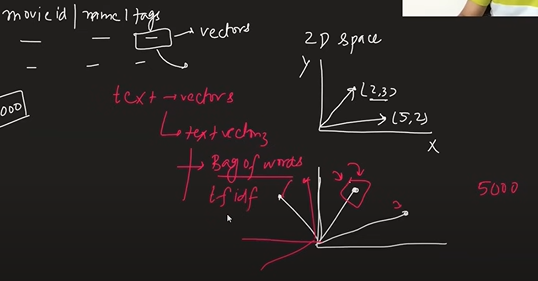
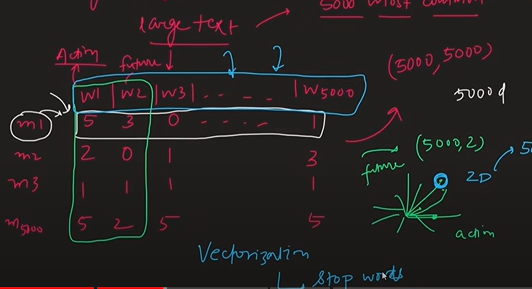


In [470]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [471]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [472]:
vectors=cv.fit_transform(new_df['tags']).toarray()# movies in vector forms 

In [473]:
cv.get_feature_names_out() # words are given below all

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [474]:
# Stemming is applied to normalize different forms of a word to a common base. For example, given the words ['love', 'loving', 'loved'],
# stemming would convert all these variations to their root form, resulting in ['love', 'love', 'love']. This helps in reducing
# dimensionality and improving the performance of machine learning models by treating different forms of a word as the same feature.


In [475]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [476]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [477]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ". join(y)

In [478]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_63480\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [479]:
# Calculate the cosine similarity between vectors to measure their similarity.
# Cosine similarity is a metric used to determine how similar two vectors are, 
# based on the cosine of the angle between them. In the context of text or document analysis,
# this helps in assessing the similarity between different text representations.
# The `cosine_similarity` function from `sklearn.metrics.pairwise` computes this similarity,
# resulting in a value between -1 and 1, where 1 indicates identical vectors and -1 indicates
# completely dissimilar vectors.
from sklearn.metrics.pairwise import cosine_similarity


In [480]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [481]:
similarity = cosine_similarity(vectors)

In [482]:
similarity

array([[1.        , 0.08740748, 0.05827165, ..., 0.02418254, 0.02564946,
        0.        ],
       [0.08740748, 1.        , 0.06451613, ..., 0.02677398, 0.        ,
        0.        ],
       [0.05827165, 0.06451613, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02418254, 0.02677398, 0.02677398, ..., 1.        , 0.07071068,
        0.04836508],
       [0.02564946, 0.        , 0.        , ..., 0.07071068, 1.        ,
        0.05129892],
       [0.        , 0.        , 0.        , ..., 0.04836508, 0.05129892,
        1.        ]])

In [483]:
similarity[0] 

array([1.        , 0.08740748, 0.05827165, ..., 0.02418254, 0.02564946,
       0.        ])

# Main Fun

In [436]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

    for i in movies_list:
        print(new_df.iloc[i[0]].title)
    

In [438]:
recommend('Batman')

Batman
Batman & Robin
The Dark Knight Rises
Batman Begins
Batman Returns


In [439]:
import pickle

In [441]:
pickle.dump(new_df,open('movies.pkl', 'wb'))

In [444]:
pickle.dump(new_df.to_dict(), open('movies_dict.pkl', 'wb'))

In [484]:
pickle.dump(similarity,open('similarity.pkl', 'wb'))